#### Exercise 6
Put all the functions defined here into a `random_walk.jl` file include them into a new juypter notebook called `executor.ipynb` and run the simulation and animation there. 
#### Solution 6

In [1]:
include("random_walk.jl")

convert_to_DF (generic function with 1 method)

In [2]:
gridsize = 210                               
cell_number = 1000                         
timesteps = 400                           
starting_config = "square"
name = "executor_sim"

grid, cell_list = create_objects(gridsize, cell_number)
grid, cell_list, cell_number = populate_sys!(grid, cell_list, starting_config,gridsize, cell_number)
cell_all_2 = update_sys(grid,cell_list,gridsize,timesteps)
data2 = convert_to_DF(cell_all_2)
save_settings(gridsize, cell_number, timesteps, starting_config, name)
CSV.write("$(name).csv",data2)
data_gr= groupby(data2,:timestep);

t, fig = animation_2D(data_gr, gridsize)
run_animation(t,timesteps)

1

#### Exercise 7
Change the movement of the cells by changing the `update_sys()` function to `update_sys_bias()` in `random_walk.jl`. Remove one of the possible movement vectors on the grid to give them a bias in a certain direction. How does the result change for long time spans? Save a video of your changed simulation. 

Hint: If you are changing a `.jl` you have to include it again, so that the changes are active in the Julia session. 
#### Solution 7

Look at `random_walk.jl`. There the function `update_sys_bias()` is defined. 

In [8]:
gridsize = 210                               
cell_number = 1000                         
timesteps = 1000                           
starting_config = "square"
name = "executor_sim"

grid, cell_list = create_objects(gridsize, cell_number)
grid, cell_list, cell_number = populate_sys!(grid, cell_list, starting_config,gridsize, cell_number)
cell_all_2 = update_sys_bias(grid,cell_list,gridsize,timesteps)
data2 = convert_to_DF(cell_all_2)
save_settings(gridsize, cell_number, timesteps, starting_config, name)
CSV.write("$(name).csv",data2)
data_gr= groupby(data2,:timestep);

t, fig = animation_2D(data_gr, gridsize)
save_animation(t,fig, data_gr, name) 

"executor_sim.mp4"

Compared to the unbiased random walk, the cells move very clearly in the opposite direction of the missing mov_vec.  

#### Exercise 8
The starting configuration in a square is not very realistic, add another option in the `populate_sys!` that puts the cells into a circle. 
#### Solution 8

Look at `random_walk.jl` to see the changes in the `populate_sys!()` function.

In [3]:
gridsize = 210                               
cell_number = 1000                         
timesteps = 1000                           
starting_config = "circle"
name = "executor_sim"

grid, cell_list = create_objects(gridsize, cell_number)
grid, cell_list, cell_number = populate_sys!(grid, cell_list, starting_config,gridsize, cell_number)
cell_all_2 = update_sys(grid,cell_list,gridsize,timesteps)
data2 = convert_to_DF(cell_all_2)
save_settings(gridsize, cell_number, timesteps, starting_config, name)
CSV.write("$(name).csv",data2)
data_gr= groupby(data2,:timestep);

t, fig = animation_2D(data_gr, gridsize)
run_animation(t,timesteps)
#save_animation(t,fig, data_gr, name) 

LoadError: BoundsError: attempt to access 0-element Vector{Int64} at index [1]

### <p style='color: red'>Very hard - Only do when you want to punish yourself</p>

#### Exercise 9
A typically way to quantify random walk is the mean squared displacement [(MSD)](https://en.wikipedia.org/wiki/Mean_squared_displacement). Make a simulation run with the following parameters: 
```julia
gridsize = 1000                               
cell_number = 1000                         
timesteps = 5000                           
starting_config = "random"
name = "msd"
```
Use the created dataframe to calculate the MSD. Plot the MSD against time in a line plot and save it. What behaviour do you see and what is expected from a [random walk](https://en.wikipedia.org/wiki/Anomalous_diffusion)? 
#### Solution 9

In [4]:
gridsize = 1000                               
cell_number = 1000                         
timesteps = 5000                           
starting_config = "random"
name = "msd"

grid, cell_list = create_objects(gridsize, cell_number)
grid, cell_list, cell_number = populate_sys!(grid, cell_list, starting_config,gridsize, cell_number)
cell_all_2 = update_sys(grid,cell_list,gridsize,timesteps)
data_msd = convert_to_DF(cell_all_2)
save_settings(gridsize, cell_number, timesteps, starting_config, name)
CSV.write("$(name).csv",data_msd)

"msd.csv"

In [5]:
using DataFramesMeta, Chain, Statistics

In [6]:
data_msd
MSD = @chain data_msd begin
    # splitt into individual cells
    groupby(:id)
    #calculate msd for every cell
    @transform(:msd = (((:x.-:x[1]).^2+(:y.-:y[1]).^2)))
    groupby(:timestep)
    @combine(:msd = mean(:msd))
end
;

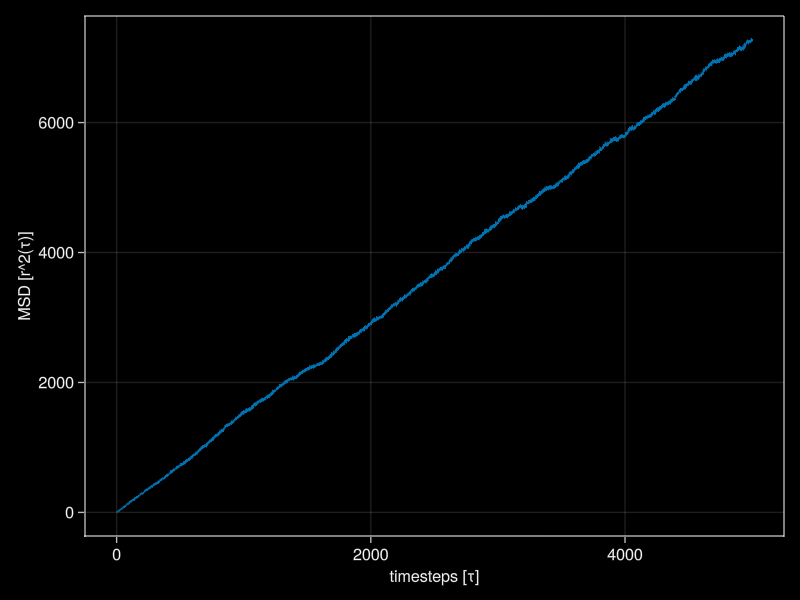

In [7]:
fig1 = Figure()
ax1 = Axis(fig1[1,1],xlabel = "timesteps [τ]", ylabel ="MSD [r^2(τ)]" ) 
lines!(ax1,MSD.timestep, MSD.msd)
fig1

The MSD is linear with respect to time, which means that normal diffusion occurs in our model. That means that this very simple model for random walk approximates the more complex Brownian motion or the continuous diffusion equation surprisingly well :).  